In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import dandelion as ddl
import os
import tools

sc.logging.print_header()

os.chdir(os.path.expanduser('/home/jovyan/Zach/scanpy/'))
adata = sc.read_h5ad('h5ad/combined_raw.h5ad')
adata

scanpy==1.8.2 anndata==0.7.6 umap==0.5.1 numpy==1.21.6 scipy==1.5.2 pandas==1.3.5 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 leidenalg==0.8.2 pynndescent==0.5.2


AnnData object with n_obs × n_vars = 53796 × 29836
    obs: 'sample_id', 'condition', 'site', 'sequencing_batch', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'S_score', 'G2M_score', 'phase'
    uns: 'filter_rna_colors'
    layers: 'counts'

In [2]:
# basic filter
sc.pp.filter_cells(adata, min_genes = 200)
sc.pp.filter_cells(adata, max_genes = 10000)
# remove high mitochondrial
adata = adata[adata.obs['gmm_pct_count_clusters_keep']].copy()
adata

AnnData object with n_obs × n_vars = 45774 × 29836
    obs: 'sample_id', 'condition', 'site', 'sequencing_batch', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'S_score', 'G2M_score', 'phase'
    uns: 'filter_rna_colors'
    layers: 'counts'

In [3]:
sc.pp.filter_genes(adata, min_cells=3)

In [4]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [5]:
# split to condition
adata = adata[(adata.obs['site'] == 'LN')].copy()
adata

AnnData object with n_obs × n_vars = 33843 × 21680
    obs: 'sample_id', 'condition', 'site', 'sequencing_batch', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'S_score', 'G2M_score', 'phase'
    var: 'n_cells'
    uns: 'filter_rna_colors', 'log1p'
    layers: 'counts'

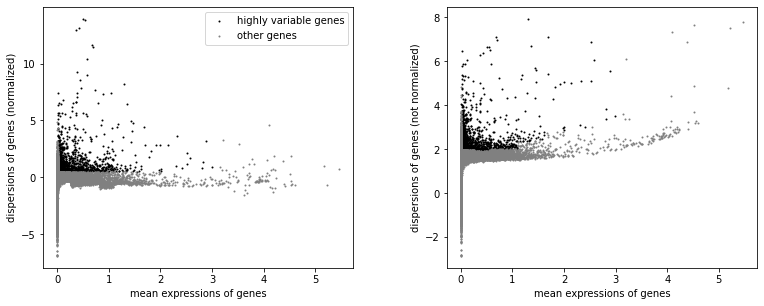

In [6]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [7]:
adata.raw = adata

In [8]:
adata = adata[:, adata.var.highly_variable].copy()
adata

AnnData object with n_obs × n_vars = 33843 × 1903
    obs: 'sample_id', 'condition', 'site', 'sequencing_batch', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'S_score', 'G2M_score', 'phase'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'filter_rna_colors', 'log1p', 'hvg'
    layers: 'counts'

In [9]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score'])
sc.pp.scale(adata, max_value=10)

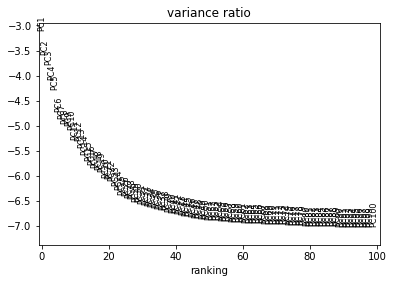

In [10]:
sc.tl.pca(adata, svd_solver='arpack', n_comps=100)
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=100)

In [11]:
sc.external.pp.harmony_integrate(adata, key = 'sequencing_batch', adjusted_basis='X_pca')

2022-07-18 15:05:28,943 - harmonypy - INFO - Iteration 1 of 10
2022-07-18 15:05:50,968 - harmonypy - INFO - Iteration 2 of 10
2022-07-18 15:06:12,528 - harmonypy - INFO - Converged after 2 iterations


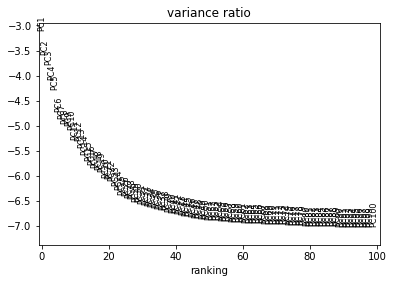

In [12]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=100)

In [13]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs = 30)
sc.tl.leiden(adata)
sc.tl.umap(adata, min_dist=.3)

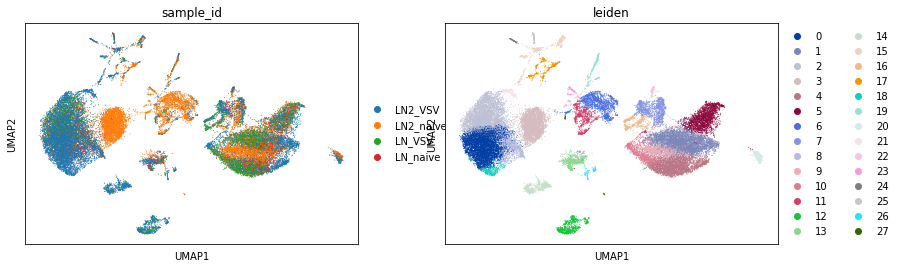

In [14]:
sc.pl.umap(adata, color=['sample_id', 'leiden'])

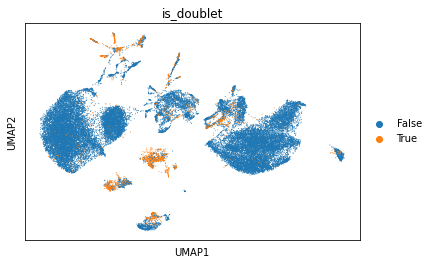

In [15]:
sc.pl.umap(adata, color = ['is_doublet'])

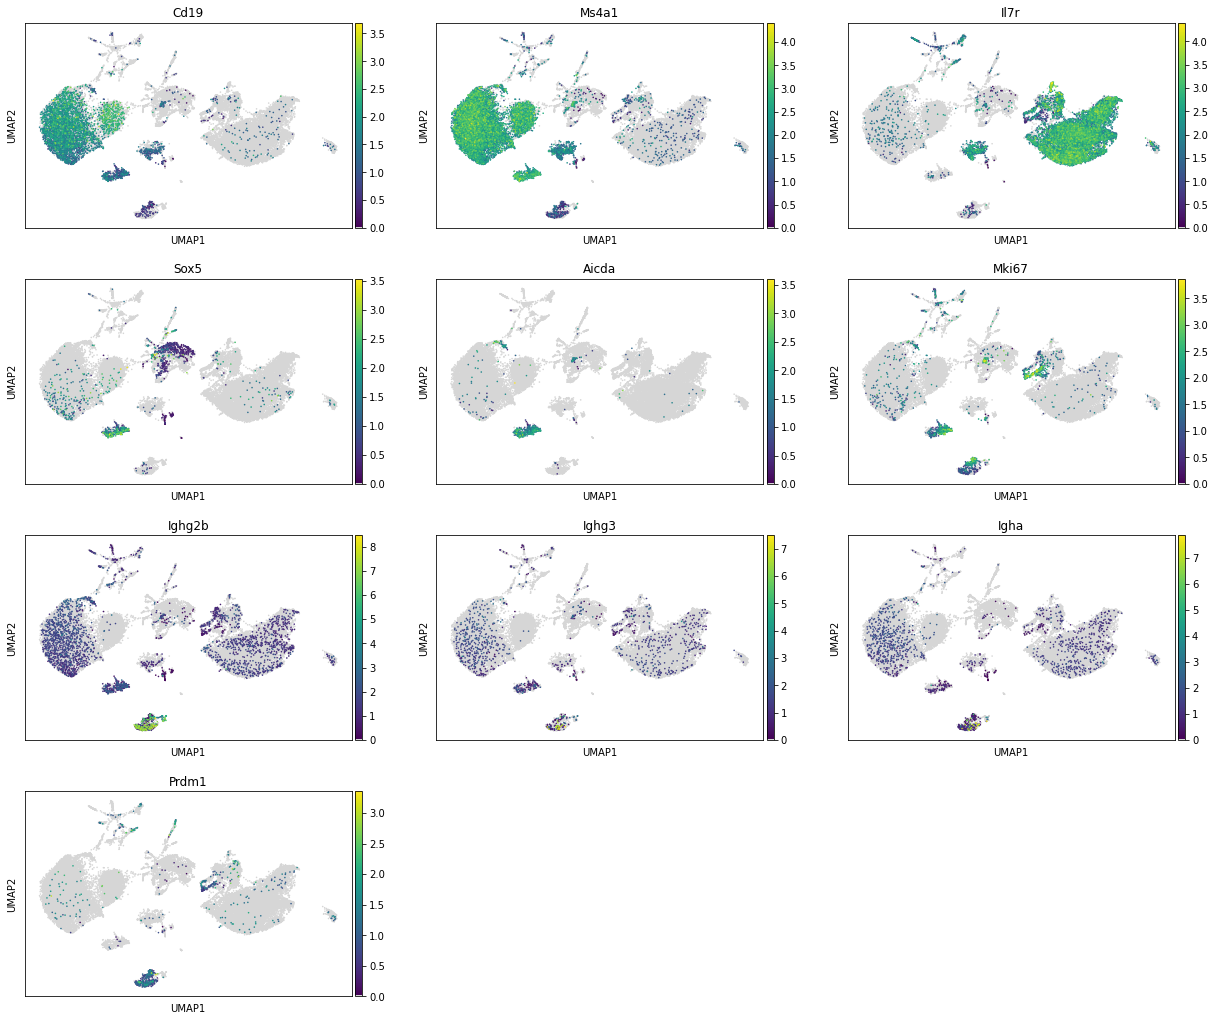

In [6]:
sc.pl.umap(adata, color = ['Cd19', 'Ms4a1', 'Il7r', 'Sox5',  'Aicda', 'Mki67', 'Ighg2b', 'Ighg3', 'Igha', 'Prdm1'], color_map = tools.cmp(), ncols = 3, size = 10)

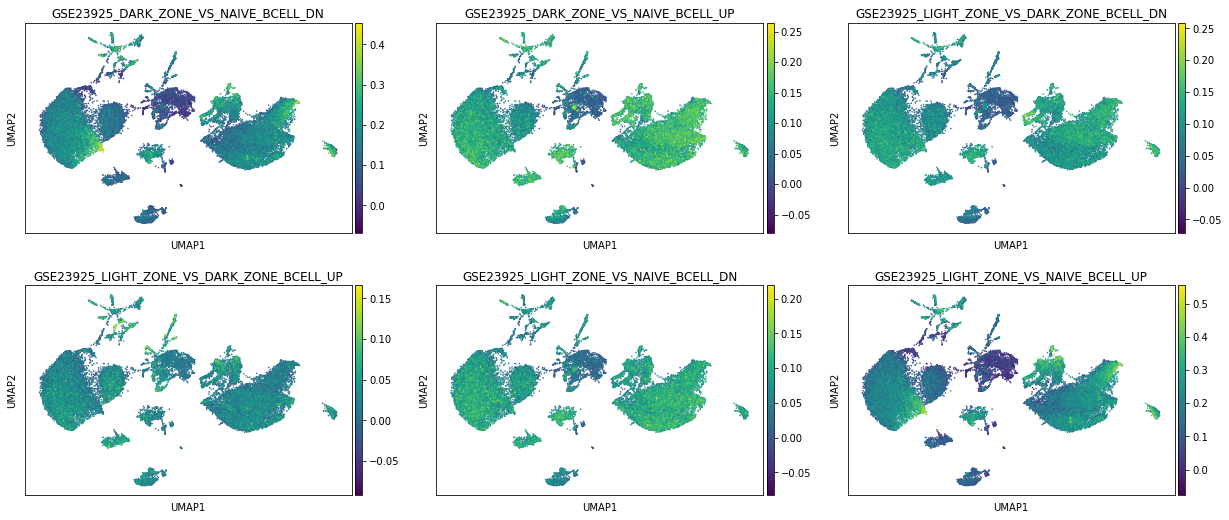

In [17]:
gs = pd.read_csv('../mouse_mouse_2010_victoria_B_cell_genesets.txt', sep = '\t')
for x in gs:
    sc.tl.score_genes(adata, [y for y in gs[x] if pd.notnull(y)], score_name = x, use_raw = True)
sc.pl.umap(adata, color = gs.columns, color_map = 'viridis', ncols = 3, size = 10)

In [18]:
adata

AnnData object with n_obs × n_vars = 33843 × 1903
    obs: 'sample_id', 'condition', 'site', 'sequencing_batch', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'S_score', 'G2M_score', 'phase', 'leiden', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_UP'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'filter_rna_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'umap', 'sample_id_colors', 'leiden_colors', 'is_doublet_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [19]:
adata.write('h5ad/ln_integrated.h5ad', compression = 'gzip')

In [ ]:
# rough annotation

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import os
import tools

sc.logging.print_header()

os.chdir(os.path.expanduser('/home/jovyan/Zach/scanpy/'))
adata = sc.read_h5ad('h5ad/ln_integrated.h5ad')
adata

scanpy==1.8.2 anndata==0.7.6 umap==0.5.1 numpy==1.21.6 scipy==1.5.2 pandas==1.3.5 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 leidenalg==0.8.2 pynndescent==0.5.2


AnnData object with n_obs × n_vars = 33843 × 1903
    obs: 'sample_id', 'condition', 'site', 'sequencing_batch', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'S_score', 'G2M_score', 'phase', 'leiden', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_UP'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'filter_rna_colors', 'hvg', 'is_doublet_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_id_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

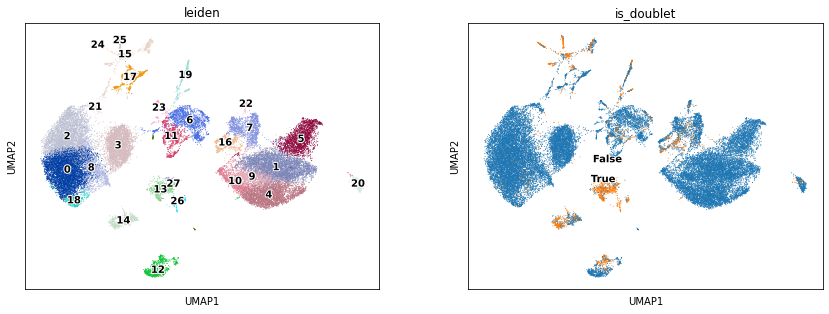

In [2]:
sc.tl.leiden(adata)
sc.pl.umap(adata, color=['leiden', 'is_doublet'], legend_loc = 'on data', legend_fontoutline = 2)

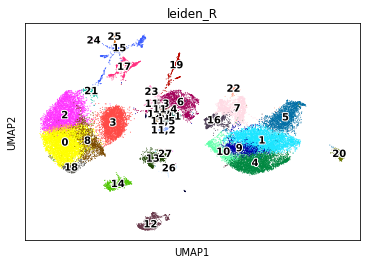

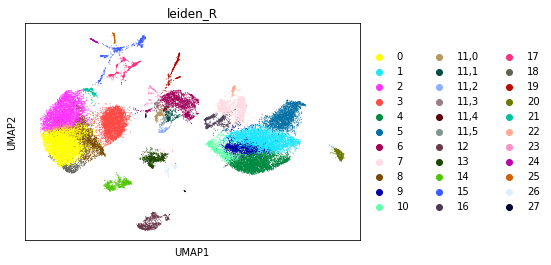

In [10]:
sc.tl.leiden(adata, resolution = .3, restrict_to = ('leiden', ['11']))
sc.pl.umap(adata, color=['leiden_R'], legend_loc = 'on data', legend_fontoutline = 2)
sc.pl.umap(adata, color=['leiden_R'])

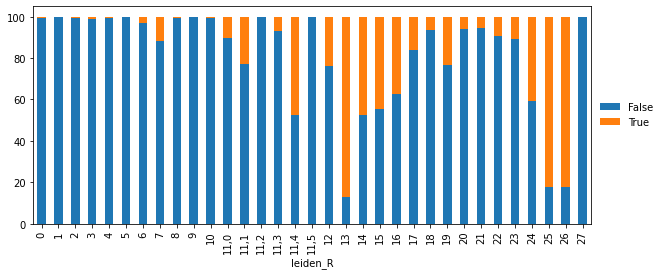

In [11]:
pd.crosstab(adata.obs['leiden_R'], adata.obs['is_doublet']).apply(lambda r: r/r.sum() * 100, axis = 1).plot.bar(stacked=True, figsize = (10,4))
plt.legend(bbox_to_anchor=(1,.5), loc = 'center left', frameon = False)

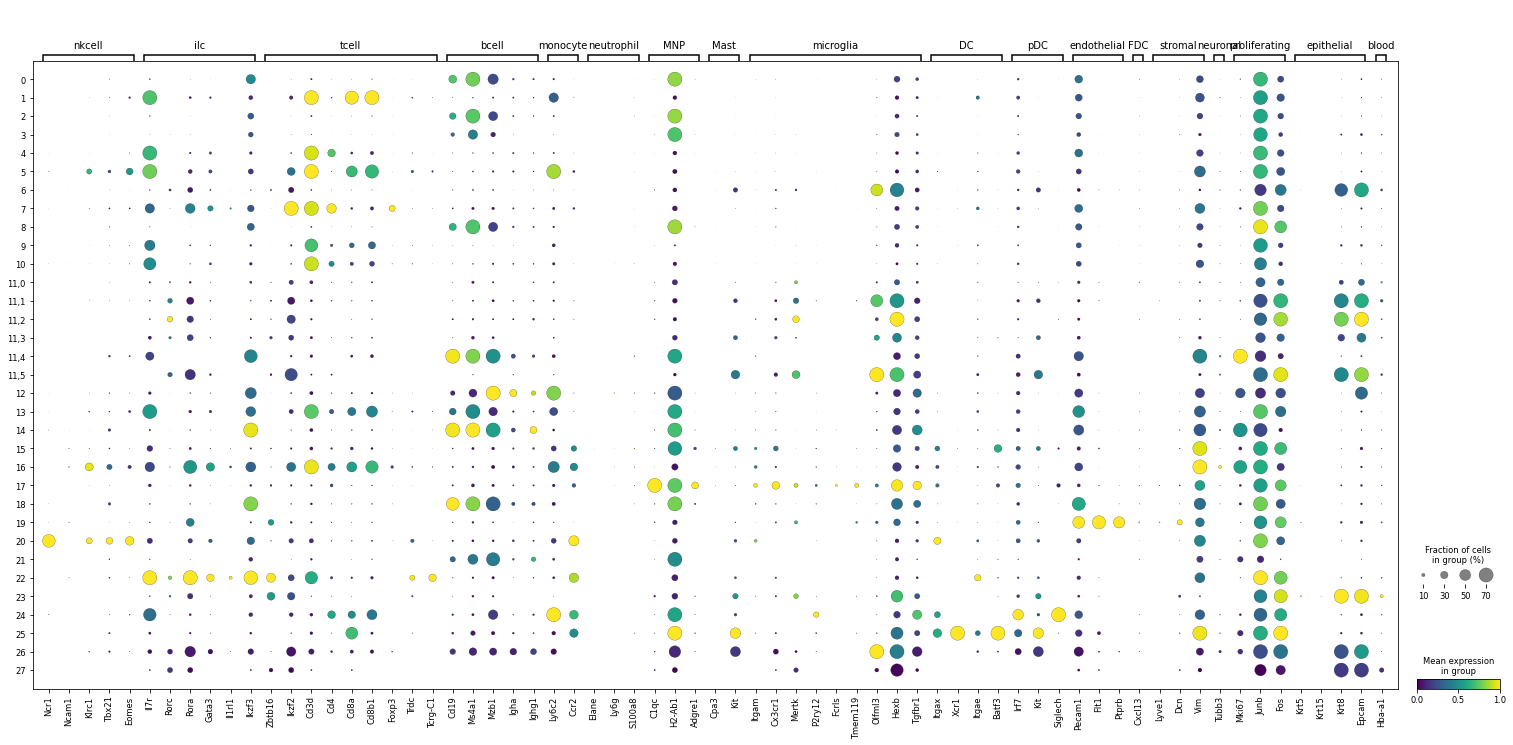

In [12]:
sc.pl.dotplot(adata, 
              {'nkcell':['Ncr1', 'Ncam1', 'Klrc1','Tbx21', 'Eomes'],
               'ilc':['Il7r', 'Rorc', 'Rora', 'Gata3', 'Il1rl1', 'Ikzf3'],
               'tcell':['Zbtb16', 'Ikzf2', 'Cd3d', 'Cd4', 'Cd8a', 'Cd8b1', 'Foxp3', 'Trdc', 'Tcrg-C1',],
               'bcell':['Cd19', 'Ms4a1', 'Mzb1', 'Igha', 'Ighg1'],
               'monocyte':['Ly6c2', 'Ccr2'],
               'neutrophil':['Elane', 'Ly6g', 'S100a8', ],
               'MNP':['C1qc', 'H2-Ab1','Adgre1',],
               'Mast':['Cpa3', 'Kit'],
               'microglia':['Itgam', 'Cx3cr1',  'Mertk', 'P2ry12', 'Fcrls', 'Tmem119', 'Olfml3', 'Hexb', 'Tgfbr1'],
               'DC':['Itgax', 'Xcr1', 'Itgae', 'Batf3'],
               'pDC':['Irf7', 'Kit', 'Siglech'],
               'endothelial':['Pecam1', 'Flt1', 'Ptprb'],
               'FDC':['Cxcl13'],
               'stromal':['Lyve1', 'Dcn', 'Vim'],
               'neuronal':['Tubb3'],
               'proliferating':['Mki67', 'Junb', 'Fos'],
               'epithelial':['Krt5', 'Krt15', 'Krt8', 'Epcam'],
               'blood':['Hba-a1']
              }
              , groupby = 'leiden_R', color_map = 'viridis', standard_scale = 'var', dot_max=.7, var_group_rotation = 0)

In [13]:
sc.tl.rank_genes_groups(adata, groupby = 'leiden_R')

/home/jovyan/my-conda-envs/dandelion/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/jovyan/my-conda-envs/dandelion/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/jovyan/my-conda-envs/dandelion/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:399: Pe

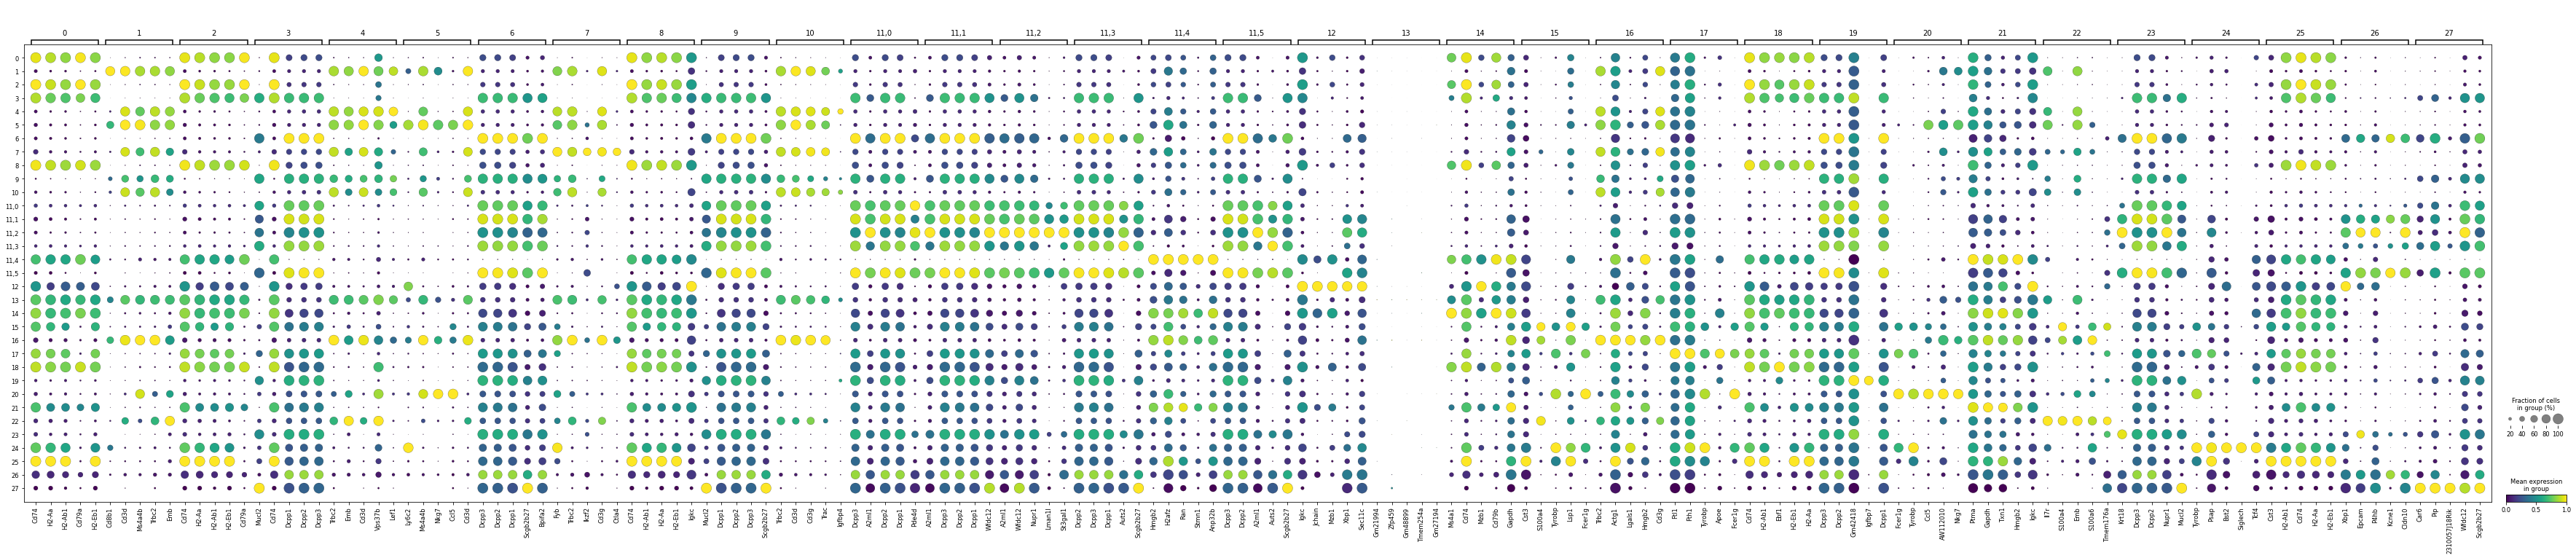

In [14]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes= 5, min_logfoldchange = 2, standard_scale = 'var', color_map = 'viridis', dendrogram = False)

/home/jovyan/my-conda-envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'celltype' as categorical


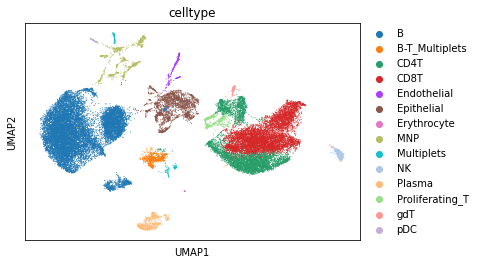

In [15]:
new_dict ={'0':'B',
'1':'CD8T',
'2':'B',
'3':'B',
'4':'CD4T',
'5':'CD8T',
'6':'Epithelial',
'7':'CD4T',
'8':'B',
'9':'CD8T',
'10':'CD4T',
'11,0':'Epithelial',
'11,1':'Epithelial',
'11,2':'Epithelial',
'11,3':'Epithelial',
'11,4':'B',
'11,5':'Epithelial',
'12':'Plasma',
'13':'B-T_Multiplets',
'14':'B',
'15':'MNP',
'16':'Proliferating_T',
'17':'MNP',
'18':'B',
'19':'Endothelial',
'20':'NK',
'21':'B',
'22':'gdT',
'23':'Epithelial',
'24':'pDC',
'25':'Multiplets',
'26':'Multiplets',
'27':'Erythrocyte',}
adata.obs['celltype'] = [new_dict[x] for x in adata.obs['leiden_R']]
sc.pl.umap(adata, color=['celltype'])

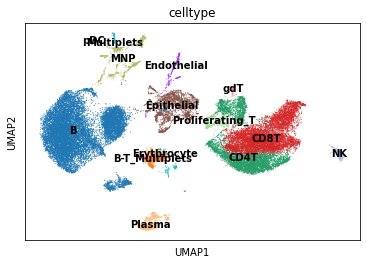

In [16]:
sc.pl.umap(adata, color=['celltype'], legend_loc = 'on data')

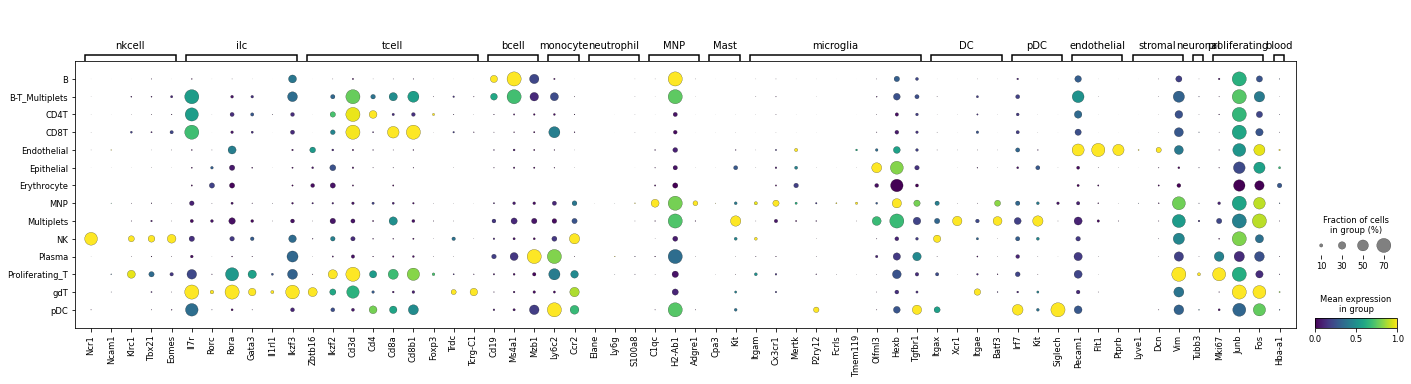

In [17]:
sc.pl.dotplot(adata, 
              {'nkcell':['Ncr1', 'Ncam1', 'Klrc1','Tbx21', 'Eomes'],
               'ilc':['Il7r', 'Rorc', 'Rora', 'Gata3', 'Il1rl1', 'Ikzf3'],
               'tcell':['Zbtb16', 'Ikzf2', 'Cd3d', 'Cd4', 'Cd8a', 'Cd8b1', 'Foxp3', 'Trdc', 'Tcrg-C1',],
               'bcell':['Cd19', 'Ms4a1', 'Mzb1'],
               'monocyte':['Ly6c2', 'Ccr2'],
               'neutrophil':['Elane', 'Ly6g', 'S100a8', ],
               'MNP':['C1qc', 'H2-Ab1','Adgre1',],
               'Mast':['Cpa3', 'Kit'],
               'microglia':['Itgam', 'Cx3cr1',  'Mertk', 'P2ry12', 'Fcrls', 'Tmem119', 'Olfml3', 'Hexb', 'Tgfbr1'],
               'DC':['Itgax', 'Xcr1', 'Itgae', 'Batf3'],
               'pDC':['Irf7', 'Kit', 'Siglech'],
               'endothelial':['Pecam1', 'Flt1', 'Ptprb'],
               'stromal':['Lyve1', 'Dcn', 'Vim'],
               'neuronal':['Tubb3'],
               'proliferating':['Mki67', 'Junb', 'Fos'],
               'blood':['Hba-a1']
              }
              , groupby = 'celltype', color_map = 'viridis', standard_scale = 'var', dot_max=.7, var_group_rotation = 0)

In [ ]:
adata.write_h5ad('h5ad/ln_integrated.h5ad', compression = 'gzip')